<a href="https://colab.research.google.com/github/malekzitouni/Word2Vec_NLP/blob/main/gensim_word_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [7]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-7-522b7d89cb5a>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [8]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)


In [9]:
model.most_similar('banana')


[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [11]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('good', 'fantastic', 'bad')


'terrible'

In [12]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))


cereal


In [22]:
def display_pca_scatterplot(model, words=None, sample=0):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    import numpy as np
    import random

    # Google Colab uses %matplotlib inline by default
    # Ensure the backend is explicitly set
    %matplotlib inline

    # Extract word vectors
    if words:
        word_vectors = np.array([model[word] for word in words])
        labels = words
    elif sample > 0:
        random_words = random.sample(model.index_to_key, sample)
        word_vectors = np.array([model[word] for word in random_words])
        labels = random_words
    else:
        raise ValueError("Either 'words' or 'sample' must be provided.")

    # Perform PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(14, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='r')

    # Annotate points
    for i, word in enumerate(labels):
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=9)

    plt.title('PCA of Word Vectors')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

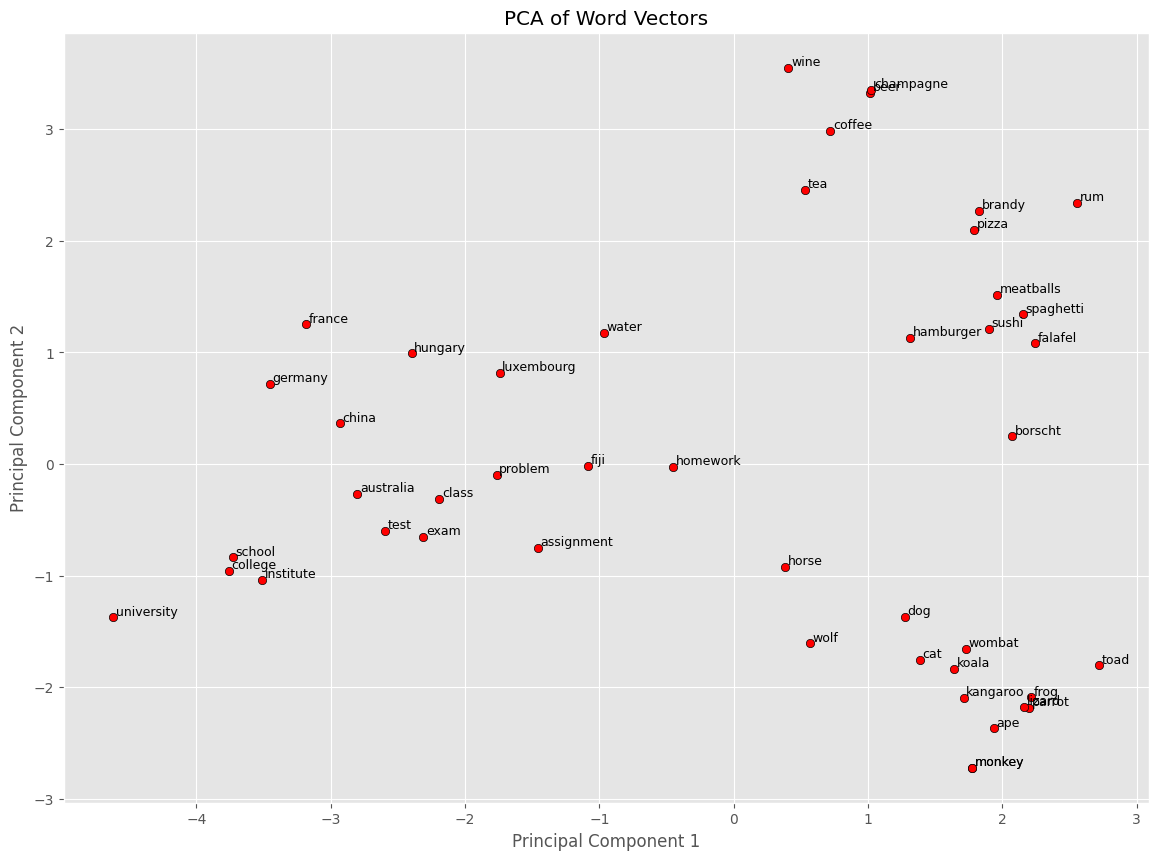

In [23]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

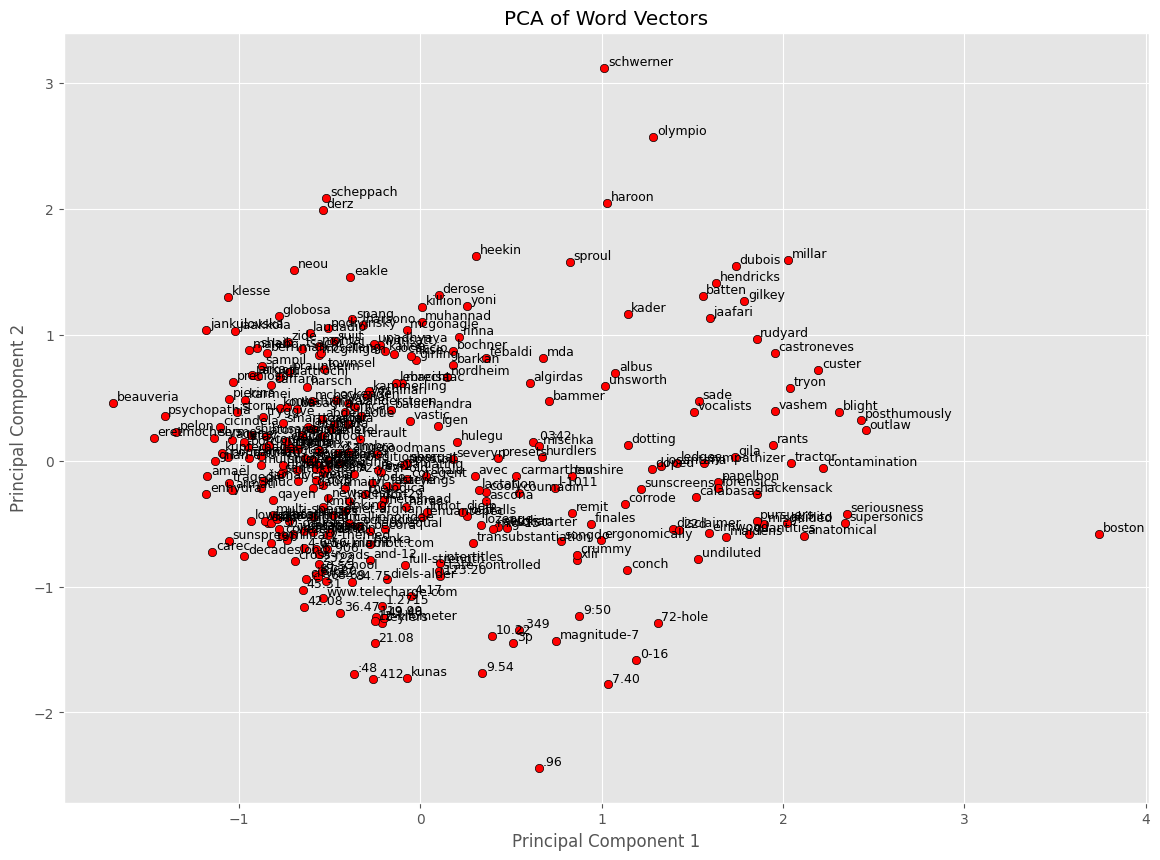

In [24]:
display_pca_scatterplot(model, sample=300)
